<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد.
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
!wget https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

--2024-11-07 15:00:05--  https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2024-11-07 15:00:05 (41.8 MB/s) - ‘dataset.py’ saved [917/917]

--2024-11-07 15:00:05--  https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


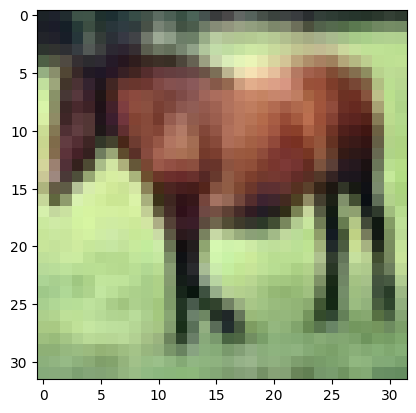

In [6]:
plt.imshow(x_train[7])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [8]:


# تبدیل نوع داده‌ای به float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# نرمال‌سازی مقادیر پیکسل‌ها به بازه‌ی ۰ تا ۱
x_train /= 255.0
x_test /= 255.0


In [10]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


In [9]:
from tensorflow.keras.utils import to_categorical

# تبدیل لیبل‌های y_train و y_test به فرمت one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train =
y_test =

<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [12]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    

</ul>
</div>


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Softmax

model = Sequential()

# لایه اول کانولوشنی با ۳۲ فیلتر، سایز ۳x3 و تابع فعالیت ReLU
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# لایه‌ی pooling با اندازه‌ی (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# لایه دوم کانولوشنی با ۳۲ فیلتر، سایز ۳x3 و تابع فعالیت ReLU
model.add(Conv2D(32, (3, 3), activation='relu'))

# لایه‌ی pooling با اندازه‌ی (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# لایه سوم کانولوشنی با ۶۴ فیلتر، سایز ۳x3 و تابع فعالیت ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))

# لایه‌ی pooling با اندازه‌ی (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# لایه Flatten برای تبدیل داده‌ها به یک بردار ۱ بعدی
model.add(Flatten())




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [20]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ساخت مدل ساده
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  # لایه ورودی با 784 نورون
    Dense(10, activation='softmax')                    # لایه خروجی با 10 نورون برای دسته‌بندی 10 کلاس
])

# تنظیم بهینه‌ساز RMSprop
opt_rms = RMSprop(learning_rate=0.001, weight_decay=1e-6)

# کامپایل کردن مدل
model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# داده‌های مصنوعی برای آموزش (می‌توانید این داده‌ها را با داده‌های واقعی جایگزین کنید)
x_train = tf.random.normal((1000, 784))  # 1000 نمونه ورودی تصادفی با ابعاد 784
y_train = tf.random.uniform((1000,), maxval=10, dtype=tf.int32)  # 1000 برچسب تصادفی برای 10 کلاس

# تبدیل y_train به حالت one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)

# آموزش مدل
model.fit(x_train, y_train, epochs=10, batch_size=32)




Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0829 - loss: 2.9333
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4131 - loss: 1.7875
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 1.2175
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9104 - loss: 0.7842
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.4928
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9995 - loss: 0.2799
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1533
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0785
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0413
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0196


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit روی مدل آن را آموزش بدهید. برای سادگی25 ایپاک با سایز بچ 64 بزنید.
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [21]:
# آموزش مدل با ۲۵ ایپاک و اندازه‌ی بچ ۶۴



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ساخت مدل ساده
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  # لایه ورودی با 784 نورون
    Dense(10, activation='softmax')                    # لایه خروجی با 10 نورون برای دسته‌بندی 10 کلاس
])

# تنظیم بهینه‌ساز RMSprop
opt_rms = RMSprop(learning_rate=0.001, weight_decay=1e-6)

# کامپایل کردن مدل
model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# داده‌های مصنوعی برای آموزش و تست
x_train = tf.random.normal((1000, 784))  # 1000 نمونه ورودی تصادفی برای آموزش
y_train = tf.random.uniform((1000,), maxval=10, dtype=tf.int32)  # 1000 برچسب تصادفی برای 10 کلاس
x_test = tf.random.normal((200, 784))   # 200 نمونه ورودی تصادفی برای تست
y_test = tf.random.uniform((200,), maxval=10, dtype=tf.int32)  # 200 برچسب تصادفی برای تست

# تبدیل y_train و y_test به حالت one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# آموزش مدل
model.fit(x_train, y_train,
          epochs=25,                  # تعداد ایپاک‌ها 25
          batch_size=64,              # سایز بچ 64
          validation_data=(x_test, y_test))  # داده‌های تست برای ارزیابی در هر ایپاک


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0827 - loss: 2.8650 - val_accuracy: 0.1000 - val_loss: 2.7699
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3405 - loss: 1.9033 - val_accuracy: 0.0900 - val_loss: 2.7702
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6196 - loss: 1.4235 - val_accuracy: 0.0900 - val_loss: 2.8145
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8075 - loss: 1.0422 - val_accuracy: 0.0900 - val_loss: 2.8615
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9164 - loss: 0.7780 - val_accuracy: 0.1000 - val_loss: 2.9326
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9711 - loss: 0.5309 - val_accuracy: 0.0950 - val_loss: 3.0243
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9970 - loss: 0.3592 - val_accuracy: 0.1000 - val_loss: 3.1237
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9995 - loss: 0.2338 - val_accuracy: 0.1050 - val_loss

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# ساخت مدل با لایه‌های بیشتر و تنظیمات پیشرفته
model = Sequential([
    # نرمال‌سازی ورودی‌ها
    BatchNormalization(input_shape=(784,)),

    # لایه اول با 512 نورون
    Dense(512, activation='relu'),
    Dropout(0.5),  # استفاده از Dropout برای جلوگیری از overfitting

    # لایه دوم با 256 نورون
    Dense(256, activation='relu'),
    Dropout(0.5),

    # لایه سوم با 128 نورون
    Dense(128, activation='relu'),
    Dropout(0.5),

    # لایه خروجی با 10 نورون برای طبقه‌بندی 10 کلاس
    Dense(10, activation='softmax')
])

# تنظیم بهینه‌ساز Adam با نرخ یادگیری تنظیم شده
optimizer = Adam(learning_rate=0.001)

# کامپایل کردن مدل با استفاده از بهینه‌ساز Adam
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# داده‌های مصنوعی برای آموزش و تست
x_train = tf.random.normal((1000, 784))  # 1000 نمونه ورودی تصادفی برای آموزش
y_train = tf.random.uniform((1000,), maxval=10, dtype=tf.int32)  # 1000 برچسب تصادفی برای 10 کلاس
x_test = tf.random.normal((200, 784))   # 200 نمونه ورودی تصادفی برای تست
y_test = tf.random.uniform((200,), maxval=10, dtype=tf.int32)  # 200 برچسب تصادفی برای تست

# تبدیل y_train و y_test به حالت one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# آموزش مدل
history = model.fit(x_train, y_train,
                    epochs=25,                  # تعداد ایپاک‌ها 25
                    batch_size=64,              # سایز بچ 64
                    validation_data=(x_test, y_test))  # داده‌های تست برای ارزیابی در هر ایپاک


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0893 - loss: 3.3016 - val_accuracy: 0.0750 - val_loss: 2.3486
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1117 - loss: 2.5905 - val_accuracy: 0.0950 - val_loss: 2.3188
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1376 - loss: 2.4095 - val_accuracy: 0.0900 - val_loss: 2.3084
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1210 - loss: 2.3628 - val_accuracy: 0.1200 - val_loss: 2.3024
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1238 - loss: 2.3355 - val_accuracy: 0.1250 - val_loss: 2.3053
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1617 - loss: 2.2517 - val_accuracy: 0.1300 - val_loss: 2.3067
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1824 - loss: 2.2369 - val_accuracy: 0.1150 - val_loss: 2.3092
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1770 - loss: 2.1943 - val_accuracy: 0.0950 - val_loss: 2.

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ و ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>